In [1]:
#Predict Personal Loan taking Customer 

In [2]:
#given data for the customers of the bank. 
#this project is to build a modlel customers who have higher chanses of purchasing the loan.

In [3]:
import numpy as np
import pandas as pd
import os
os.environ["PATH"] += os.pathsep + 'C:/Users/Shado/Anaconda3/Library/bin/graphviz'
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#1.IMPORTING NEEDED LIBRARIES

In [5]:
data = pd.read_csv('D:\Internship\Project\Bank_Personal_Loan_Modelling.csv')
data.head()


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [6]:
#Loading the data

In [7]:
data.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [8]:
data.shape

(5000, 14)

In [9]:
data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [10]:
#1) data has 5000 row and 14 attributes.
#3) data is numeric in nature.
#3) Experience can not be negative but our table is showing it. So we have to clean this attribute.

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [12]:
# these are something which tellls about data

In [13]:
#Lets check that wheather age and experience are correlated

In [14]:
data['Experience'].corr(data['Age'])

0.9942148569683319

In [15]:
corr = data.corr(method = 'pearson')
corr

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


In [16]:
# these columns are highly correlated so we can use only one column.

In [17]:
#2.Cleaning the data of further access

In [18]:
#The id of a person is allotted randomly we drop it. So we will drop id column.
# the experience is highly correlated to age so we will drop experience column.

In [19]:
data = data.drop(['ID','Experience'],axis=1)

In [20]:
#3.EXPLORATORY DATA ANALYSIS

In [21]:
data.nunique(axis=0)

Age                    45
Income                162
ZIP Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

In [22]:
#various columns have categorical values like
#Family, Education, Personal Loan, Securities Account, CD Account, Online, CreditCard. .

In [23]:
l = ['Family', 'Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
for col in l:
    print(col)
    print(data[col].value_counts())
    

Family
1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64
Education
1    2096
3    1501
2    1403
Name: Education, dtype: int64
Personal Loan
0    4520
1     480
Name: Personal Loan, dtype: int64
Securities Account
0    4478
1     522
Name: Securities Account, dtype: int64
CD Account
0    4698
1     302
Name: CD Account, dtype: int64
Online
1    2984
0    2016
Name: Online, dtype: int64
CreditCard
0    3530
1    1470
Name: CreditCard, dtype: int64


In [24]:
# analyze this above output using graph

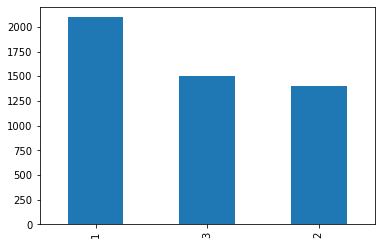

In [25]:
data['Education'].value_counts().plot(kind = 'bar')

In [26]:
#here 2096 are undergraduate. professionals(1501) are more than graduate(1403).

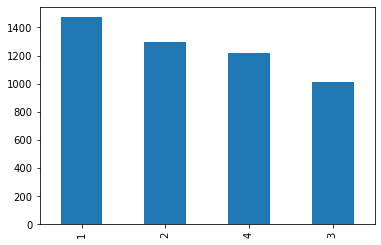

In [27]:
data['Family'].value_counts().plot(kind = 'bar')

In [28]:
#family size of the customers are here. Most of them single.

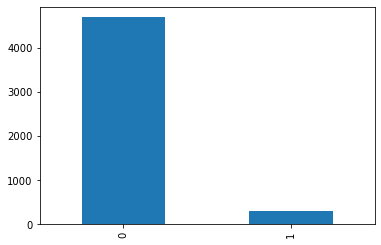

In [29]:
data['CD Account'].value_counts().plot(kind = 'bar')

In [30]:
#Only 302 people from 5000 peope have this account

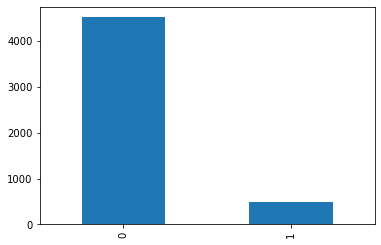

In [31]:
data['Personal Loan'].value_counts().plot(kind = 'bar')

In [32]:
#Only 480 people from 5000 has acquired the loan

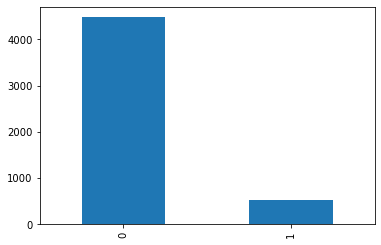

In [33]:
data['Securities Account'].value_counts().plot(kind = 'bar')

In [34]:
#Only 522 people are having Security account in the bank

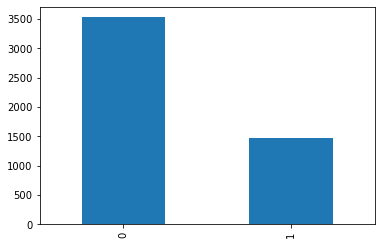

In [35]:
data['CreditCard'].value_counts().plot(kind = 'bar')

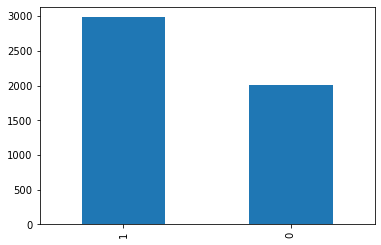

In [36]:
data['Online'].value_counts().plot(kind = 'bar')

In [37]:
#It seems many people are using online facilities provided by bank.

In [38]:
#Zip code can be dropped as it is a nominal value

In [39]:
data=data.drop('ZIP Code',axis = 1)
data

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,29,40,1,1.9,3,0,0,0,0,1,0
4996,30,15,4,0.4,1,85,0,0,0,1,0
4997,63,24,2,0.3,3,0,0,0,0,0,0
4998,65,49,3,0.5,2,0,0,0,0,1,0


In [40]:
sum(data['Mortgage']==0)

3462

In [41]:
#3462 customers has house mortgage value o be zero

In [42]:
sum(data['CCAvg']==0)

106

In [43]:
#these are the persons who doesnot use credit card

In [44]:
#Univariate analysis

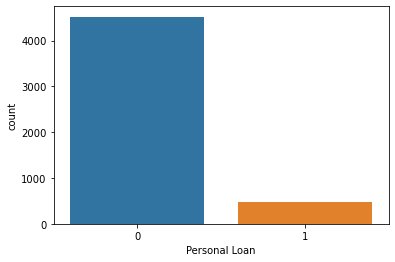

In [45]:
sns.countplot(data['Personal Loan'])

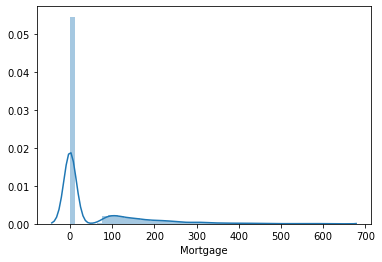

In [46]:
sns.distplot(data['Mortgage'])

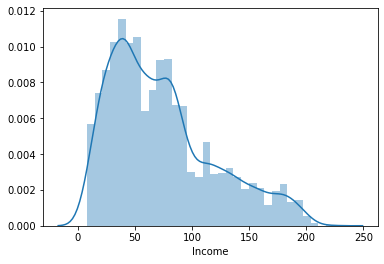

In [47]:
sns.distplot(data.Income)

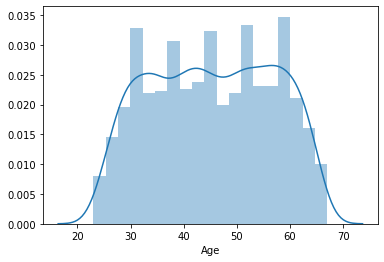

In [48]:
sns.distplot(data.Age)

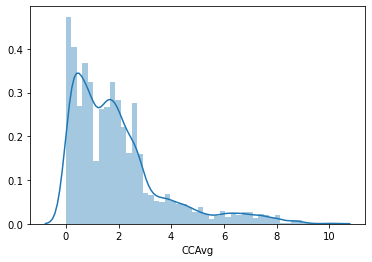

In [49]:
sns.distplot(data.CCAvg)

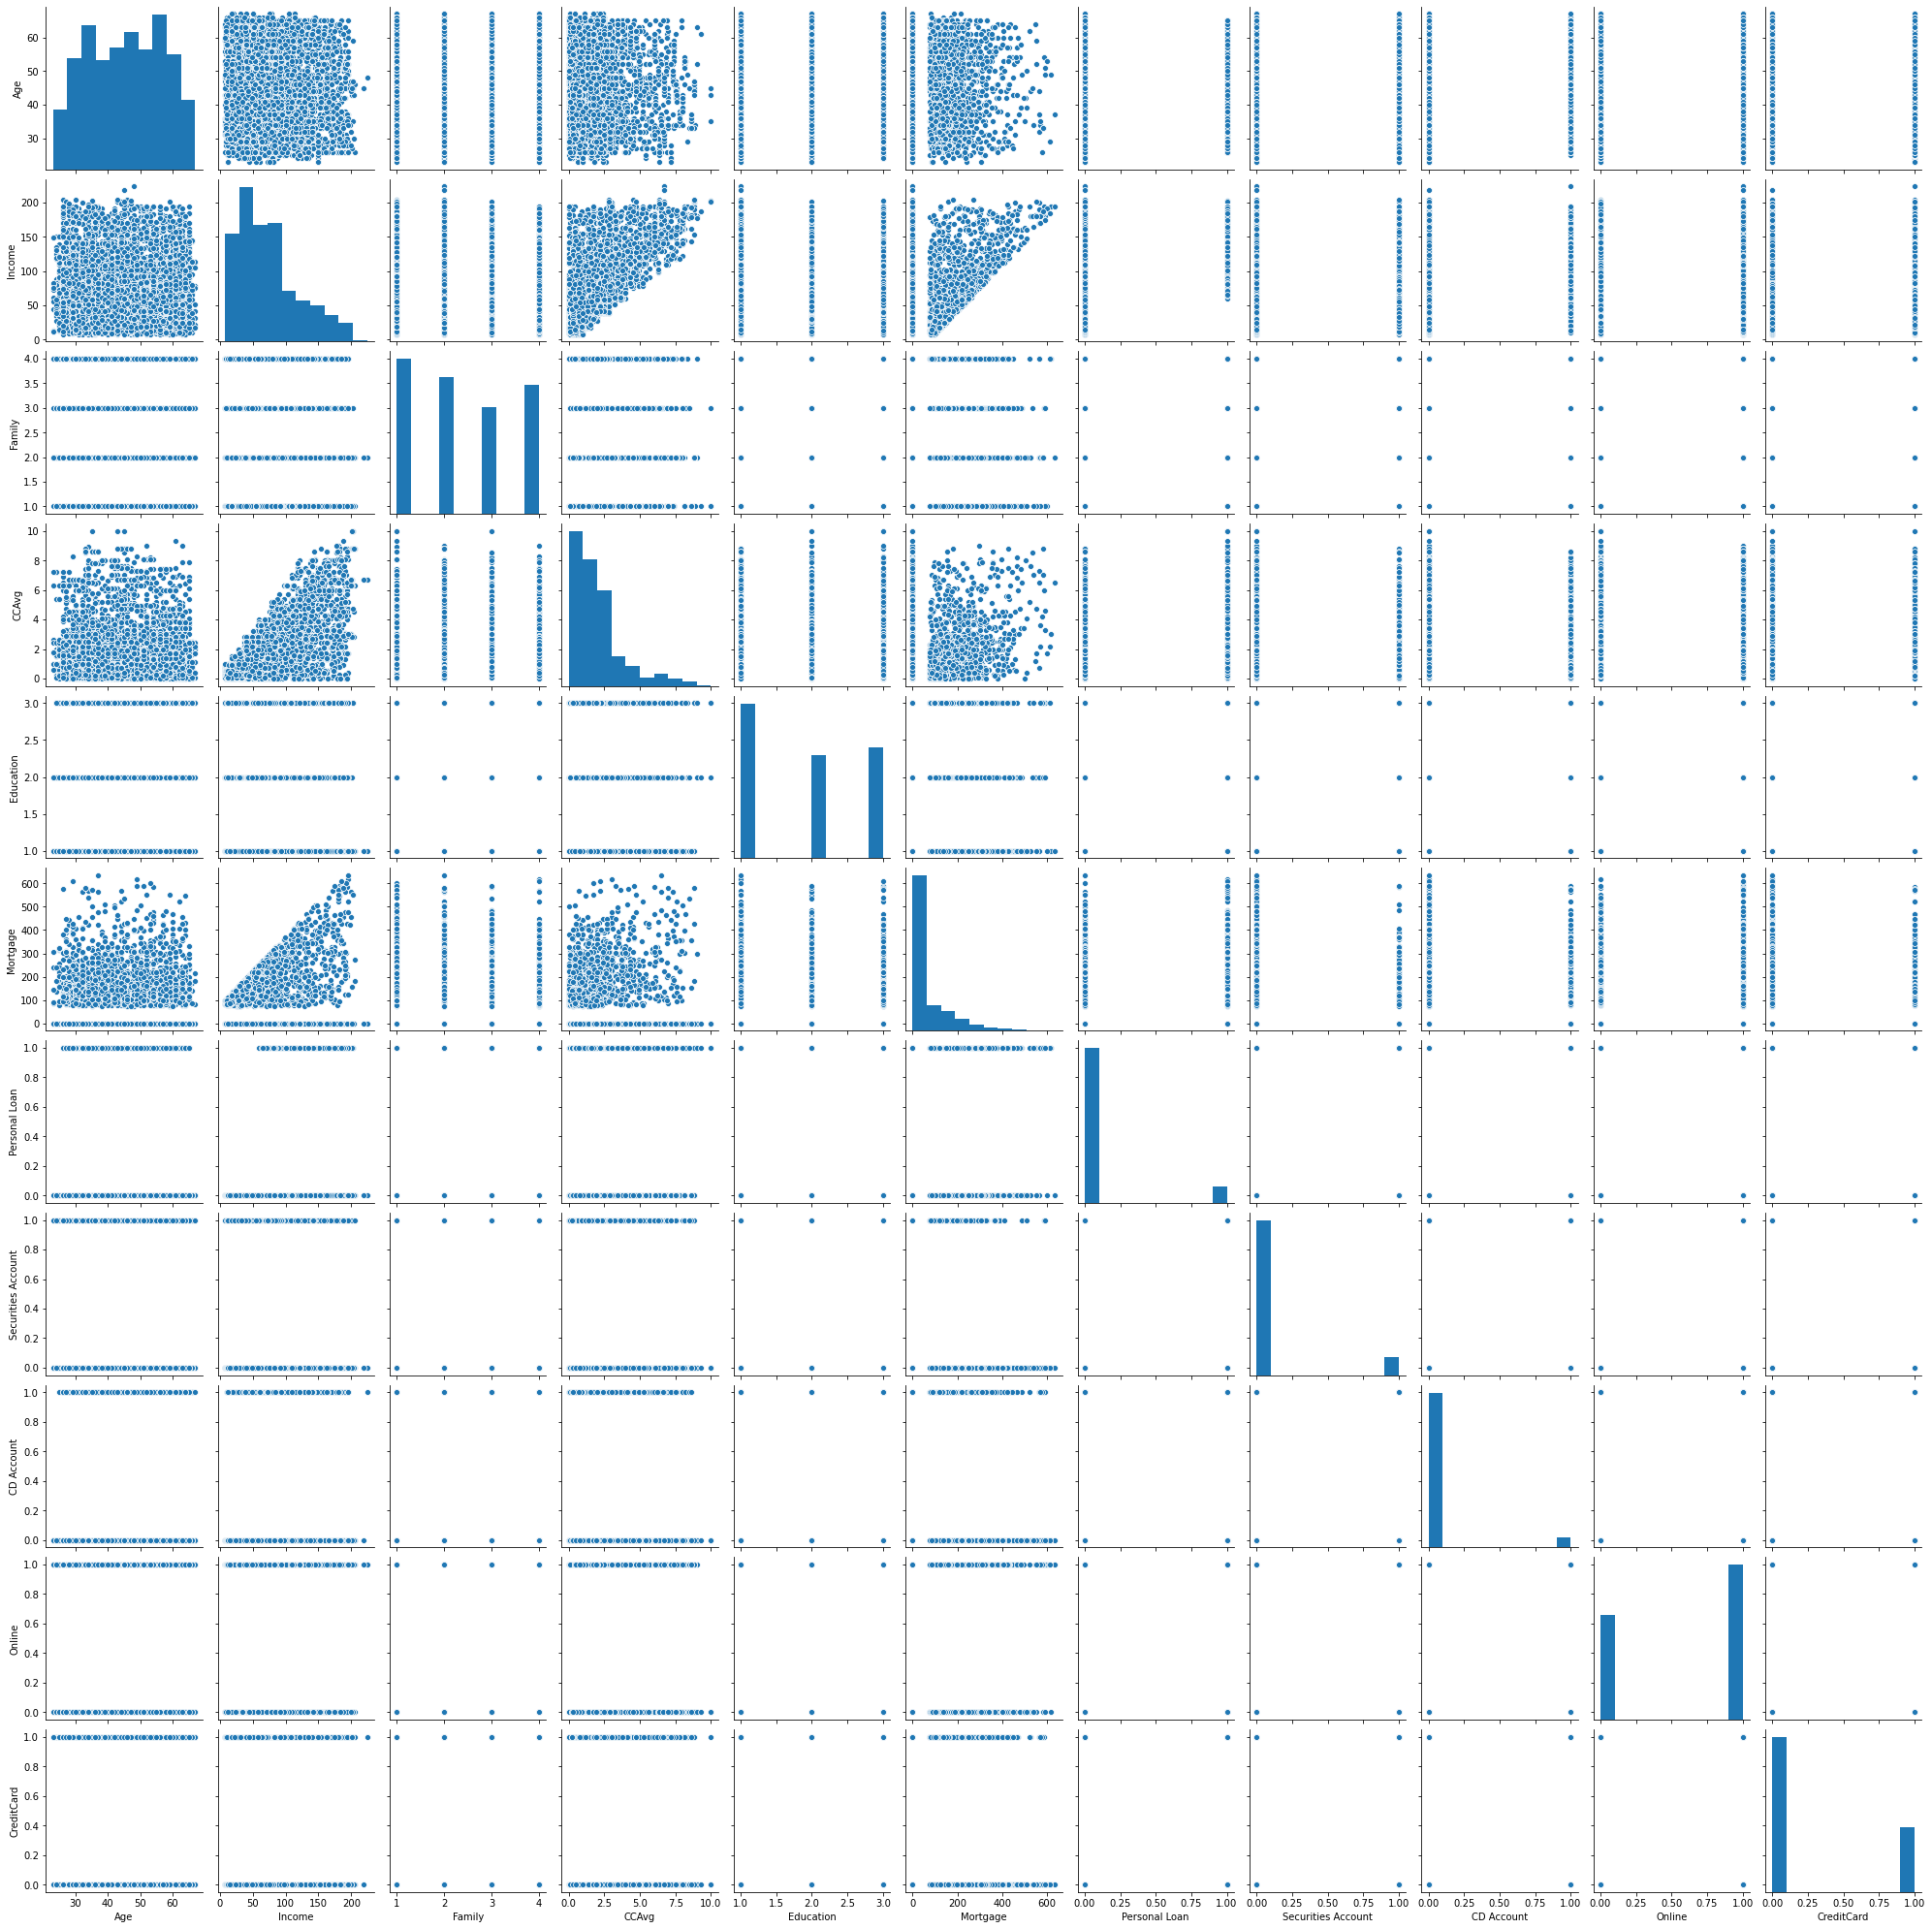

In [50]:
sns.pairplot(data)

In [51]:
sum(data.duplicated()==True)

13

In [52]:
#multivariate analysis

Text(0, 0.5, 'education')

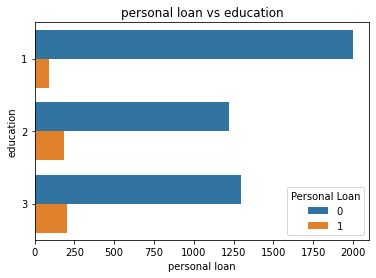

In [53]:
sns.countplot(y = 'Education', data = data, hue = 'Personal Loan')
plt.title('personal loan vs education')
plt.xlabel('personal loan')
plt.ylabel('education')

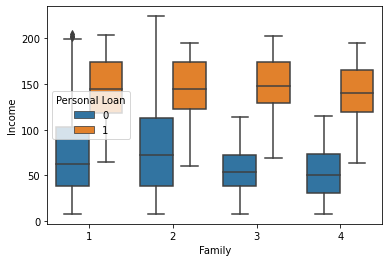

In [54]:
sns.boxplot(x='Family',y='Income',hue='Personal Loan', data = data)

Text(0, 0.5, 'security account')

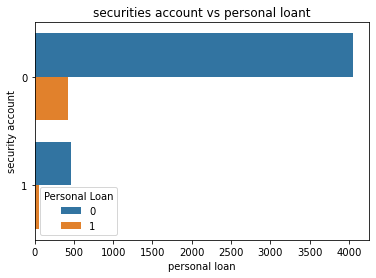

In [55]:
sns.countplot(y = 'Securities Account', data = data, hue = 'Personal Loan')
plt.title('securities account vs personal loant')
plt.xlabel('personal loan')
plt.ylabel('security account')

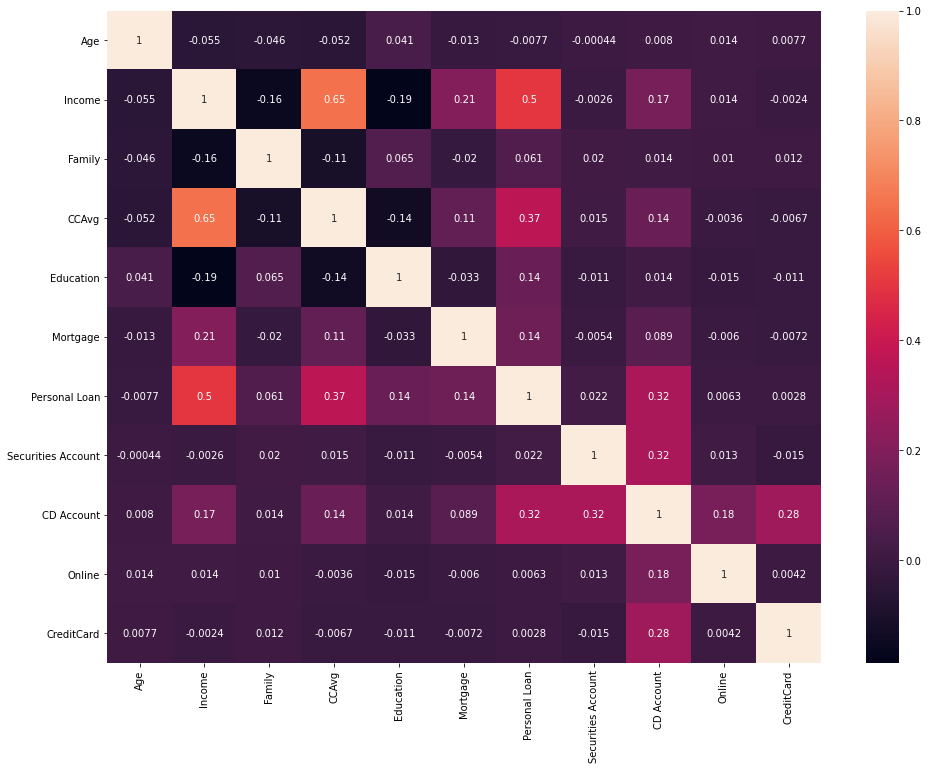

In [56]:
plt.subplots(figsize = (16,12))
sns.heatmap(data.corr(),annot = True)

In [57]:
#x features for  model and personal loan as y feature.

In [58]:
x = data[['Age','Income','Family','CCAvg','Online','CreditCard','Education', 'Mortgage', 'Securities Account', 'CD Account']]
y = data['Personal Loan'].values

In [59]:
#Income and CCAvg are added after scaling them

In [60]:
#FEATURE SCALING , TRANSFORMATION

In [61]:
#income and ccavg and mortgage value skewed so transformation is to be done.

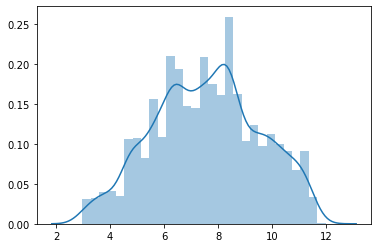

In [62]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson',standardize=False)
pt.fit(x['Income'].values.reshape(-1,1))
sns.distplot(pt.transform(x['Income'].values.reshape(-1,1)))

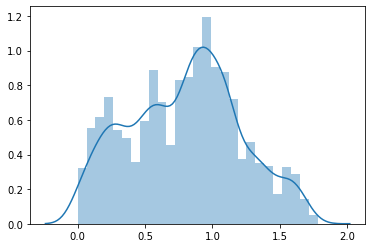

In [63]:
pt = PowerTransformer(method='yeo-johnson',standardize=False)
pt.fit(x['CCAvg'].values.reshape(-1,1))
sns.distplot(pt.transform(x['CCAvg'].values.reshape(-1,1)))

In [64]:
x['MortgageM'] = pd.cut(x['Mortgage'],bins=[0,100,200,300,400,500,600,700],labels=[0,1,2,3,4,5,6],include_lowest=True)
x.drop('Mortgage',axis=1,inplace=True)

In [65]:
#TRAINING AND TESTING DATA

In [66]:
#logistic regression

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scx = StandardScaler()
scy = StandardScaler()
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 0,stratify = y)
scx.fit_transform(x_train)
scx.transform(x_test)
#scy.fit_transform(y_train.reshape(-1,1))
#scy.transform(y_test.reshape(-1,1))

array([[-0.97265109,  2.31851937, -1.21736706, ..., -0.33649896,
        -0.24878345, -0.47490853],
       [ 0.85873161,  0.16296952, -0.34389746, ...,  2.97177736,
        -0.24878345, -0.47490853],
       [ 0.24827071,  1.18631137, -1.21736706, ...,  2.97177736,
        -0.24878345, -0.47490853],
       ...,
       [ 0.68431421, -0.92569202, -0.34389746, ..., -0.33649896,
        -0.24878345,  0.68340496],
       [-0.97265109, -0.53377386, -1.21736706, ..., -0.33649896,
        -0.24878345, -0.47490853],
       [-0.01335539, -0.33781479,  0.52957214, ...,  2.97177736,
        -0.24878345, -0.47490853]])

In [68]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [69]:
model.fit(x_train,y_train)

C:\Users\Shado\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [70]:
y_pred = model.predict(x_test)

In [71]:
from sklearn import metrics

In [72]:
print(metrics.accuracy_score(y_test,y_pred))

0.9446666666666667


In [73]:
print(metrics.accuracy_score(y_train,model.predict(x_train)))

0.9494285714285714


In [74]:
print("mean error:",metrics.mean_absolute_error(y_test,y_pred))
print("R2 score:",metrics.r2_score(y_test,y_pred))

mean error: 0.05533333333333333
R2 score: 0.36240167158308745


In [75]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[1331   25]
 [  58   86]]


In [76]:
#accuracy score for ur test data is 94.4%. But in confusion matrix  thae false negative are very much that is 40%.

In [77]:
#KNN algorithm

In [78]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [79]:
y_pred = neigh.predict(x_test)

In [80]:
print("Accuracy score for test data",metrics.accuracy_score(y_test,y_pred))

Accuracy score for test data 0.9273333333333333


In [81]:
print("Accuracy score for train data",metrics.accuracy_score(y_train,model.predict(x_train)))

Accuracy score for train data 0.9494285714285714


In [82]:
print("Mean error:",metrics.mean_absolute_error(y_test,y_pred))
print("R2 score:",metrics.r2_score(y_test,y_pred))

Mean error: 0.07266666666666667
R2 score: 0.16267207472959677


In [83]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[1324   32]
 [  77   67]]


In [84]:
#Its accuracy score is 98%

In [85]:
#RANDOM FOREST

In [86]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(x_train,y_train)

RandomForestClassifier()

In [87]:
y_pred = clf.predict(x_test)

In [88]:

print("Accuracy score for test data",metrics.accuracy_score(y_test,y_pred))

Accuracy score for test data 0.9893333333333333


In [89]:
print("Accuracy score for train data",metrics.accuracy_score(y_train,model.predict(x_train)))

Accuracy score for train data 0.9494285714285714


In [90]:
print("Mean error:",metrics.mean_absolute_error(y_test,y_pred))
print("R2 score:",metrics.r2_score(y_test,y_pred))

Mean error: 0.010666666666666666
R2 score: 0.8770894788593904


In [91]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[1354    2]
 [  14  130]]


In [92]:
#he accuracy score is 98% for test data

In [93]:
#summary:
#In the first step  we imported various libraries and our data. and viewed all about data.
#We found that age and experience are highly correlated and id zip code were nominal values so we droped the experience column.
#The Income and CCAvg column were left skewed so we applied Power transformation to them to normalize them.
#The mortgage column was also skewed so we use binning technique.
#After this used several models to make predictions.
#comparing all the results knn algorithm and random tree has best prediction 